<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat3/GeoPandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import geopandas as gpd
from geopandas import datasets, read_file, GeoDataFrame
import matplotlib.pyplot as plt

In [3]:
zipfile='lsm.zip'
kota=gpd.read_file(zipfile)
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


<Axes: >

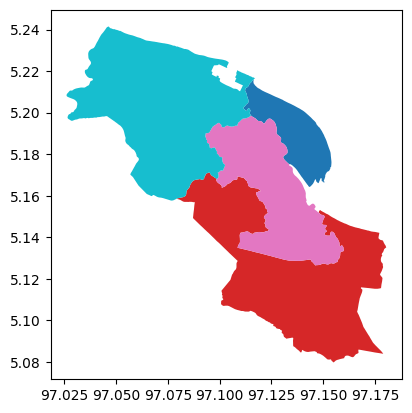

In [5]:
kota.plot(column='NAMOBJ')

In [8]:
#-- pip install mapclassify
import mapclassify

In [13]:
kota.explore(column='NAMOBJ',
             tooltip='NAMOBJ', popup=True,
             tiles='CartoDB positron', cmap='Set1',style_kwds=dict(color='black') )

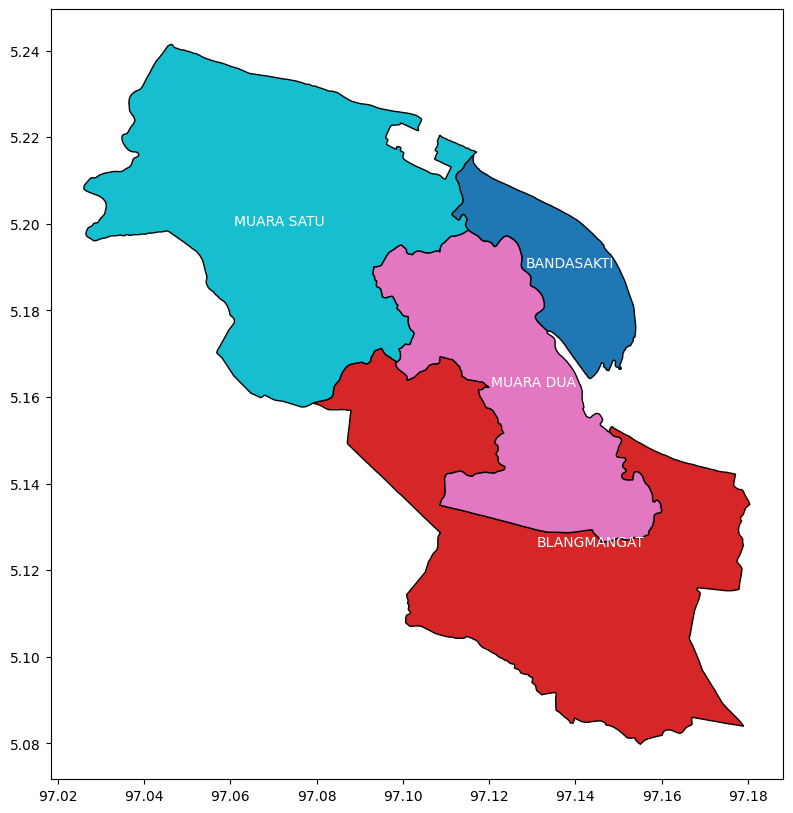

In [19]:
kota["coords"] = kota["geometry"].apply(lambda x: x.representative_point().coords[:])
kota["coords"] = [coords[0] for coords in kota["coords"]]
fig, ax = plt.subplots(figsize = (10,10))
kota.plot(ax=ax,   column="NAMOBJ", categorical=True,edgecolor="black", )
for idx, row in kota.iterrows():
   plt.annotate(text=row["NAMOBJ"], xy=row["coords"], horizontalalignment="center", color="white")

In [70]:
filename = "acehJson.geojson"
file = open(filename)
df = gpd.read_file(file)

In [71]:
df.shape

(6542, 162)

In [72]:
import pandas as pd
df.head()

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,...,PERANG_,KEPALA_,BIARAW_,WIRASWAST_,LAINNYA_12,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,geometry
0,24.0,1101012001,KEUDE BAKONGAN,110101.0,ACEH,ACEH SELATAN,BAKONGAN,KEUDE BAKONGAN,1330.0,394.0,...,0.0,1.0,0.0,95.0,0.0,23.0,1101012001,KEUDE BAKONGAN,110101.0,"MULTIPOLYGON (((97.47670 2.93545, 97.48346 2.9..."
1,26.0,1101012003,UJUNG PADANG,110101.0,ACEH,ACEH SELATAN,BAKONGAN,UJUNG PADANG,640.0,190.0,...,0.0,0.0,0.0,13.0,0.0,25.0,1101012003,UJUNG PADANG,110101.0,"MULTIPOLYGON (((97.47670 2.93545, 97.47282 2.9..."
2,102.0,1101052020,LHOK AMAN,110105.0,ACEH,ACEH SELATAN,MEUKEK,LHOK AMAN,1132.0,342.0,...,2.0,1.0,0.0,37.0,0.0,101.0,1101052020,LHOK AMAN,110105.0,"MULTIPOLYGON (((97.09457 3.43455, 97.08767 3.4..."
3,33.0,1101022003,PASI KUALA ASAHAN,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,PASI KUALA ASAHAN,743.0,189.0,...,0.0,1.0,0.0,14.0,0.0,32.0,1101022003,PASI KUALA ASAHAN,110102.0,"MULTIPOLYGON (((97.31123 3.11865, 97.31261 3.1..."
4,34.0,1101022004,GUNUNG PULO,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,GUNUNG PULO,756.0,212.0,...,0.0,0.0,0.0,24.0,0.0,33.0,1101022004,GUNUNG PULO,110102.0,"MULTIPOLYGON (((97.34582 3.13380, 97.34865 3.1..."


In [73]:
data=pd.DataFrame(df)
data.head()

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,...,PERANG_,KEPALA_,BIARAW_,WIRASWAST_,LAINNYA_12,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,geometry
0,24.0,1101012001,KEUDE BAKONGAN,110101.0,ACEH,ACEH SELATAN,BAKONGAN,KEUDE BAKONGAN,1330.0,394.0,...,0.0,1.0,0.0,95.0,0.0,23.0,1101012001,KEUDE BAKONGAN,110101.0,"MULTIPOLYGON (((97.47670 2.93545, 97.48346 2.9..."
1,26.0,1101012003,UJUNG PADANG,110101.0,ACEH,ACEH SELATAN,BAKONGAN,UJUNG PADANG,640.0,190.0,...,0.0,0.0,0.0,13.0,0.0,25.0,1101012003,UJUNG PADANG,110101.0,"MULTIPOLYGON (((97.47670 2.93545, 97.47282 2.9..."
2,102.0,1101052020,LHOK AMAN,110105.0,ACEH,ACEH SELATAN,MEUKEK,LHOK AMAN,1132.0,342.0,...,2.0,1.0,0.0,37.0,0.0,101.0,1101052020,LHOK AMAN,110105.0,"MULTIPOLYGON (((97.09457 3.43455, 97.08767 3.4..."
3,33.0,1101022003,PASI KUALA ASAHAN,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,PASI KUALA ASAHAN,743.0,189.0,...,0.0,1.0,0.0,14.0,0.0,32.0,1101022003,PASI KUALA ASAHAN,110102.0,"MULTIPOLYGON (((97.31123 3.11865, 97.31261 3.1..."
4,34.0,1101022004,GUNUNG PULO,110102.0,ACEH,ACEH SELATAN,KLUET UTARA,GUNUNG PULO,756.0,212.0,...,0.0,0.0,0.0,24.0,0.0,33.0,1101022004,GUNUNG PULO,110102.0,"MULTIPOLYGON (((97.34582 3.13380, 97.34865 3.1..."


In [78]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)"
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)"
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)"
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)"


In [81]:
dt=pd.read_excel('coba_gis.xlsx')
dt.head()

,NAMOBJ,PENDAPATAN
0,BANDASAKTI,1200000
1,BLANGMANGAT,700000
2,MUARA DUA,1000000
3,MUARA SATU,900000


In [83]:
kota1=kota.merge(dt,on='NAMOBJ')
kota1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords,PENDAPATAN
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)",1200000
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)",700000
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)",1000000
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)",900000


<Axes: >

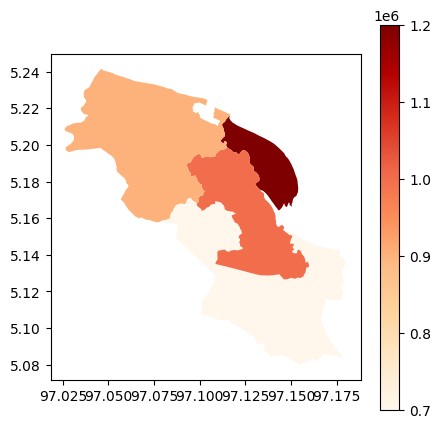

In [86]:
kota1.plot(column='PENDAPATAN', cmap='OrRd', figsize=(5,5), legend=True)

<Axes: >

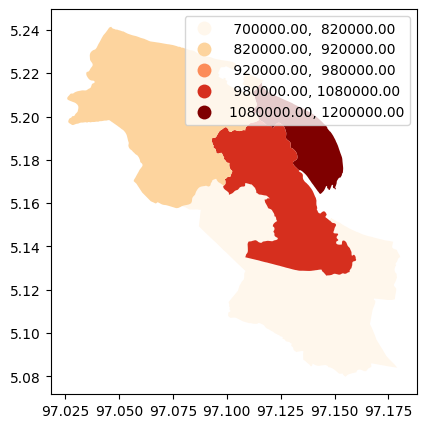

In [89]:
kota1.plot(column='PENDAPATAN', cmap='OrRd', scheme='quantiles', figsize=(5,5), legend=True )

<Axes: >

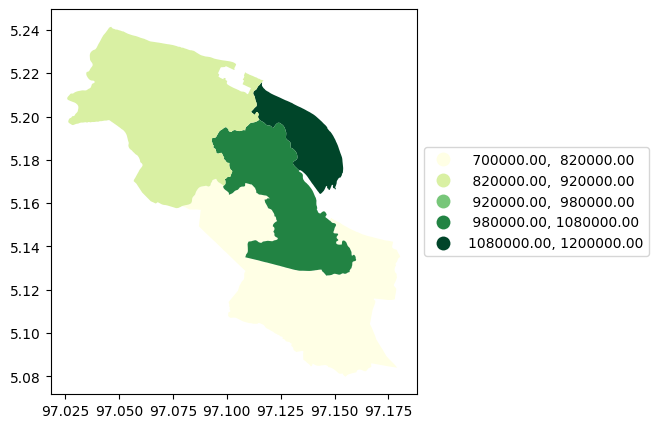

In [92]:
kota1.plot(column='PENDAPATAN', cmap='YlGn', scheme='quantiles', figsize=(5,5), legend=True,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})